In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import sqrt, log 
from clawpack import riemann
from clawpack import pyclaw
 
def qsol(x,t,ql,qr):
    """
    The initial and true solution.  
    """
    import numpy as np
    dim = x.shape[0] 
    q = np.empty(dim)
     
    if qr < ql:
        s = (qr+ql)/2
        for i in range(dim):
            if x[i]>=s*t:
                q[i] = qr
            else:
                q[i] = ql
    else:
        if t > 0:
            xr = qr*t
            xl = ql*t
            for i in range(dim):
                if x[i]>=xl and x[i]<=xr:
                    q[i] = x[i]/t
                elif x[i]>xr:
                    q[i] = qr
                elif x[i]<xl:
                    q[i] = ql
        else:
            for i in range(dim):
                if x[i]>=0:
                    q[i] = qr
                else:
                    q[i] = ql
                
    return q

def setup(ql,qr):
    
    solver = pyclaw.ClawSolver1D()
    solver.rp = riemann.burgers_1D_py.burgers_1D

    solver.num_waves = 1
    solver.num_eqn = 1
    solver.kernel_language = 'Python'
    solver.limiters = pyclaw.limiters.tvd.superbee
    solver.bc_lower[0] = pyclaw.BC.extrap
    solver.bc_upper[0] = pyclaw.BC.extrap
    solver.order = 2 #1: Godunov, 2: Lax-Wendroff-LeVeque
    
    x = pyclaw.Dimension(-1, 1., 200, name='x')
    domain = pyclaw.Domain(x)
    num_eqn = 1
    
    state = pyclaw.State(domain, num_eqn)  
    state.problem_data['efix'] = True
    
    xc = domain.grid.x.centers
    
    state.q[0, :] = qsol(xc,0,ql,qr)
 
    claw = pyclaw.Controller()
    claw.solution = pyclaw.Solution(state, domain)
    claw.solver = solver
    claw.outdir = './_output'
    claw.output_style = 1
    claw.tfinal = 2.0
    claw.num_output_times = 20
    claw.keep_copy = True

    return claw


2024-04-01 18:09:22,846 INFO CLAW: Solution 0 computed for time t=0.000000
2024-04-01 18:09:22,857 INFO CLAW: Solution 1 computed for time t=0.100000


2024-04-01 18:09:22,867 INFO CLAW: Solution 2 computed for time t=0.200000
2024-04-01 18:09:22,879 INFO CLAW: Solution 3 computed for time t=0.300000
2024-04-01 18:09:22,887 INFO CLAW: Solution 4 computed for time t=0.400000
2024-04-01 18:09:22,896 INFO CLAW: Solution 5 computed for time t=0.500000
2024-04-01 18:09:22,908 INFO CLAW: Solution 6 computed for time t=0.600000
2024-04-01 18:09:22,921 INFO CLAW: Solution 7 computed for time t=0.700000
2024-04-01 18:09:22,933 INFO CLAW: Solution 8 computed for time t=0.800000
2024-04-01 18:09:22,944 INFO CLAW: Solution 9 computed for time t=0.900000
2024-04-01 18:09:22,956 INFO CLAW: Solution 10 computed for time t=1.000000
2024-04-01 18:09:22,966 INFO CLAW: Solution 11 computed for time t=1.100000
2024-04-01 18:09:22,977 INFO CLAW: Solution 12 computed for time t=1.200000
2024-04-01 18:09:22,986 INFO CLAW: Solution 13 computed for time t=1.300000
2024-04-01 18:09:22,996 INFO CLAW: Solution 14 computed for time t=1.400000
2024-04-01 18:09:23,

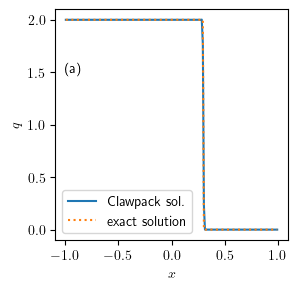

In [2]:
claw = setup(2,0)
claw.run()

plt.rcParams['text.usetex'] = True
index = 3
frame = claw.frames[index]
dt    = claw.tfinal/claw.num_output_times
t     = dt*index
x     = frame.state.grid.c_centers
x     = x[0]
true  = qsol(x,t,2,0)
fig, ax = plt.subplots(figsize=(3,3))
w = frame.q[0,:]

ax.plot(x, w, label='Clawpack sol.')
ax.plot(x, true, ':',label='exact solution')
ax.legend(loc='lower left')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$q$')
plt.text(-1,1.5,'(a)' )
plt.savefig("ShockBurgerClaw.pdf",bbox_inches='tight')

2024-04-01 18:09:45,481 INFO CLAW: Solution 0 computed for time t=0.000000
2024-04-01 18:09:45,490 INFO CLAW: Solution 1 computed for time t=0.100000
2024-04-01 18:09:45,499 INFO CLAW: Solution 2 computed for time t=0.200000
2024-04-01 18:09:45,509 INFO CLAW: Solution 3 computed for time t=0.300000
2024-04-01 18:09:45,521 INFO CLAW: Solution 4 computed for time t=0.400000
2024-04-01 18:09:45,533 INFO CLAW: Solution 5 computed for time t=0.500000
2024-04-01 18:09:45,544 INFO CLAW: Solution 6 computed for time t=0.600000
2024-04-01 18:09:45,553 INFO CLAW: Solution 7 computed for time t=0.700000
2024-04-01 18:09:45,561 INFO CLAW: Solution 8 computed for time t=0.800000
2024-04-01 18:09:45,569 INFO CLAW: Solution 9 computed for time t=0.900000
2024-04-01 18:09:45,575 INFO CLAW: Solution 10 computed for time t=1.000000
2024-04-01 18:09:45,581 INFO CLAW: Solution 11 computed for time t=1.100000
2024-04-01 18:09:45,588 INFO CLAW: Solution 12 computed for time t=1.200000
2024-04-01 18:09:45,59

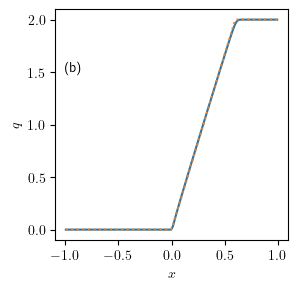

In [3]:
claw = setup(0,2)
claw.run()

plt.rcParams['text.usetex'] = True
index = 3

frame = claw.frames[index]
dt = claw.tfinal/claw.num_output_times
t = dt*index
x = frame.state.grid.c_centers
x = x[0]
true = qsol(x,t,0,2)
fig, ax = plt.subplots(figsize=(3,3))
w = frame.q[0,:]

ax.plot(x, w, label='Clawpack sol.')
ax.plot(x, true, ':',label='exact solution')
#ax.legend(loc='lower left')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$q$')
plt.text(-1,1.5,'(b)' )
plt.savefig("RarefactionBurgerClaw.pdf",bbox_inches='tight')


2024-04-01 18:11:33,299 INFO CLAW: Solution 0 computed for time t=0.000000
2024-04-01 18:11:33,305 INFO CLAW: Solution 1 computed for time t=0.100000
2024-04-01 18:11:33,311 INFO CLAW: Solution 2 computed for time t=0.200000
2024-04-01 18:11:33,318 INFO CLAW: Solution 3 computed for time t=0.300000
2024-04-01 18:11:33,324 INFO CLAW: Solution 4 computed for time t=0.400000
2024-04-01 18:11:33,330 INFO CLAW: Solution 5 computed for time t=0.500000
2024-04-01 18:11:33,336 INFO CLAW: Solution 6 computed for time t=0.600000
2024-04-01 18:11:33,343 INFO CLAW: Solution 7 computed for time t=0.700000
2024-04-01 18:11:33,351 INFO CLAW: Solution 8 computed for time t=0.800000
2024-04-01 18:11:33,357 INFO CLAW: Solution 9 computed for time t=0.900000
2024-04-01 18:11:33,362 INFO CLAW: Solution 10 computed for time t=1.000000
2024-04-01 18:11:33,367 INFO CLAW: Solution 11 computed for time t=1.100000
2024-04-01 18:11:33,373 INFO CLAW: Solution 12 computed for time t=1.200000
2024-04-01 18:11:33,38

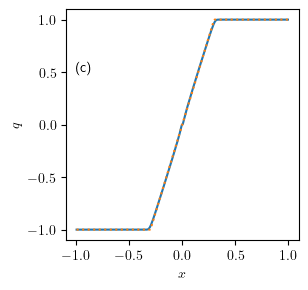

In [4]:
ul = -1 ; ur = 1
claw = setup(ul,ur)
claw.run()

plt.rcParams['text.usetex'] = True
index = 3
frame = claw.frames[index]
dt = claw.tfinal/claw.num_output_times
t = dt*index
x = frame.state.grid.c_centers
x = x[0]
true = qsol(x,t,ul,ur)
fig, ax = plt.subplots(figsize=(3.,3))
w = frame.q[0,:]

ax.plot(x, w, label='Clawpack sol.')
ax.plot(x, true, ':',label='exact solution')
#ax.legend(loc='lower left')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$q$')
plt.text(-1,0.5,'(c)' )
plt.savefig("TransonicBurgerClaw.pdf",bbox_inches='tight')